In [ ]:
# ===============================
# Exploratory Data Analysis (EDA)
# Dataset: WDBC - Breast Cancer
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load data
# -------------------------------
data_path = "../data/data.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


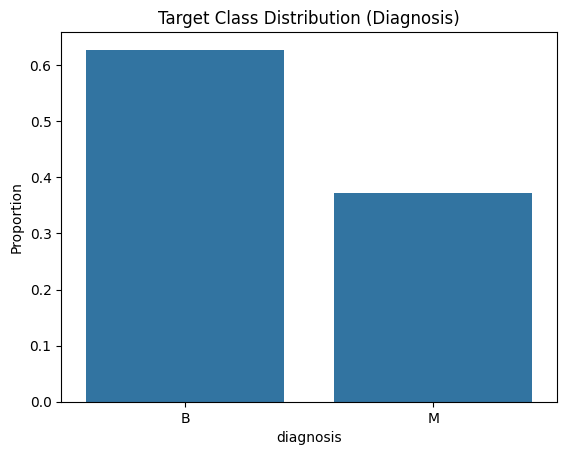

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [17]:
# Target distribution
target_counts = df['diagnosis'].value_counts(normalize=True)

plt.figure()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target Class Distribution (Diagnosis)")
plt.ylabel("Proportion")
plt.show()

print(target_counts)


Tập dữ liệu có mức mất cân bằng nhẹ, không cần áp dụng kỹ thuật xử lý imbalance phức tạp cho Logistic Regression.

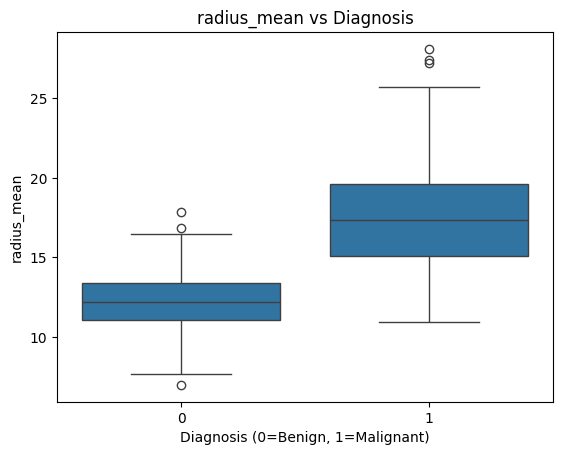

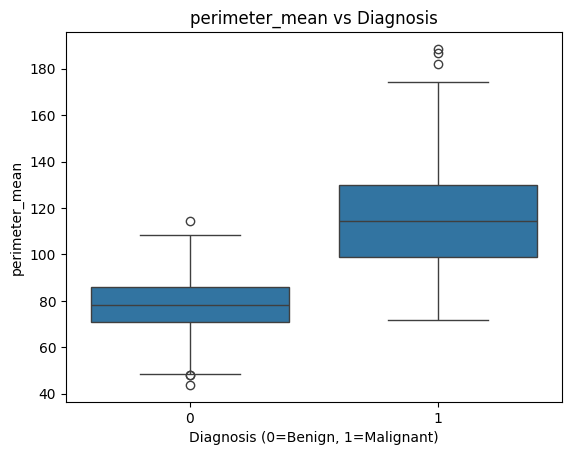

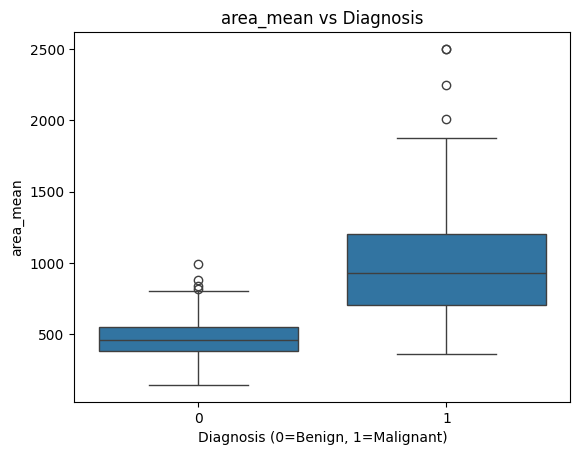

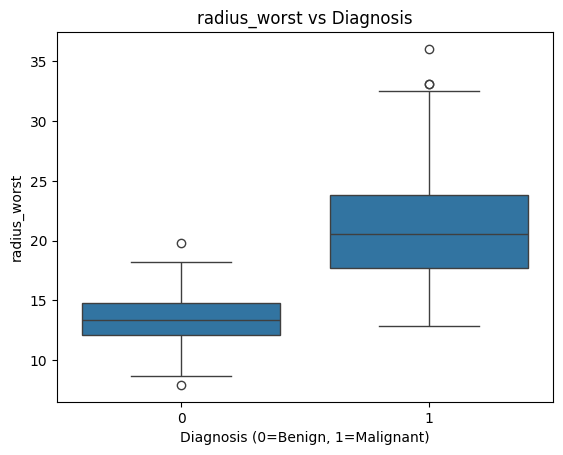

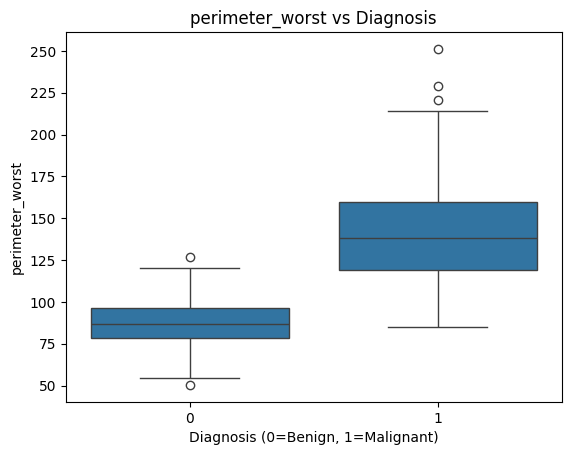

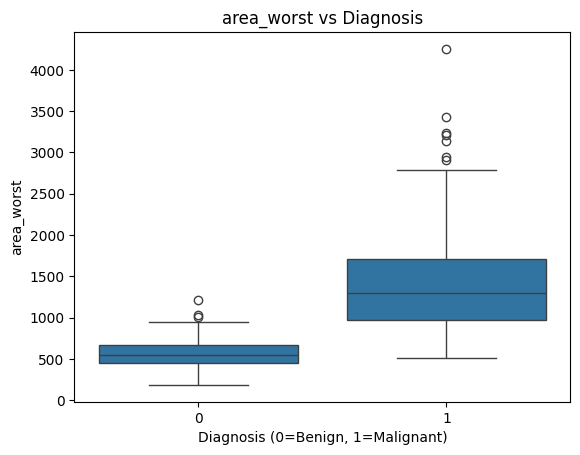

In [18]:
df['y'] = df['diagnosis'].map({'M': 1, 'B': 0})
features = [
    'radius_mean', 'perimeter_mean', 'area_mean',
    'radius_worst', 'perimeter_worst', 'area_worst'
]

for feature in features:
    plt.figure()
    sns.boxplot(x='y', y=feature, data=df)
    plt.title(f"{feature} vs Diagnosis")
    plt.xlabel("Diagnosis (0=Benign, 1=Malignant)")
    plt.show()


Các đặc trưng hình học thể hiện sự khác biệt rõ rệt giữa hai lớp, phù hợp với mô hình Logistic Regression.

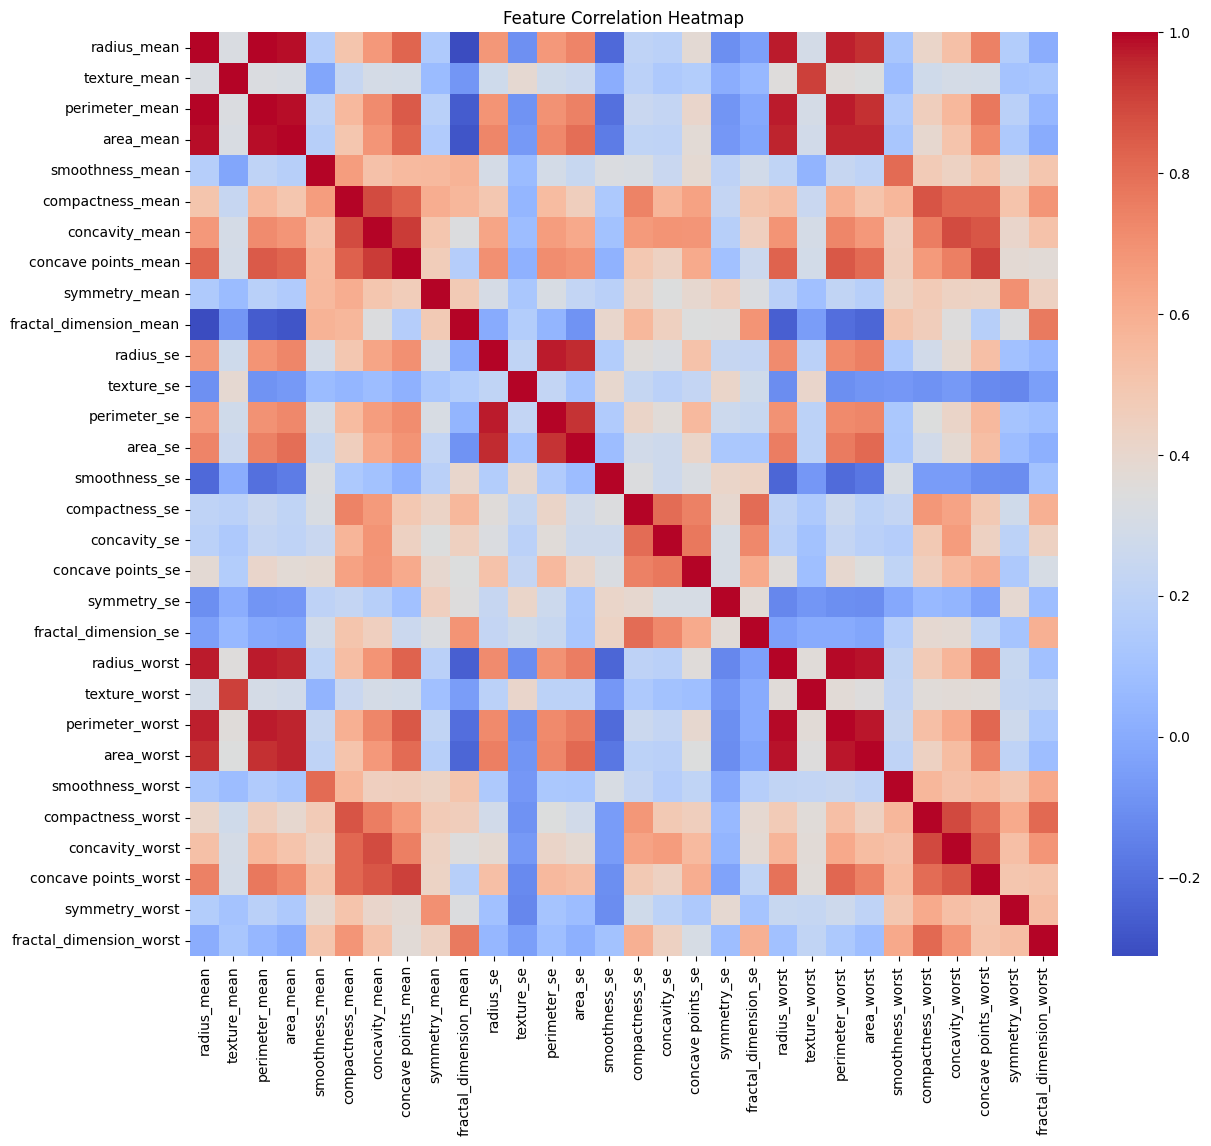

In [19]:
# Correlation matrix
corr = df.drop(columns=['id', 'diagnosis', 'y']).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Biểu đồ ma trận tương quan thể hiện mức độ tương quan tuyến tính giữa các đặc trưng trong tập dữ liệu thông qua hệ số tương quan Pearson. Giá trị tương quan nằm trong khoảng từ −1 đến 1, trong đó giá trị tuyệt đối càng lớn thể hiện mức độ liên hệ càng mạnh giữa hai đặc trưng.

Quan sát biểu đồ cho thấy nhóm đặc trưng liên quan đến kích thước khối u gồm radius, perimeter và area có mức tương quan rất cao với nhau ở cả ba tập đặc trưng mean, se và **worst`. Điều này cho thấy các đặc trưng này phản ánh những thông tin gần tương đương về mặt hình học.

Nhóm đặc trưng mô tả độ phức tạp và mức độ lõm của biên khối u gồm compactness, concavity và concave points cũng thể hiện tương quan mạnh, đặc biệt rõ rệt ở nhóm worst. Các đặc trưng này có xu hướng biến thiên đồng thời và đóng vai trò quan trọng trong việc phân biệt trạng thái khối u.

Ngược lại, các đặc trưng như smoothness, symmetry và fractal_dimension có mức tương quan thấp hơn với các nhóm còn lại, cho thấy chúng mang thông tin bổ sung và ít bị trùng lặp.

Đối với biến mục tiêu diagnosis_encoded, biểu đồ cho thấy mối tương quan cao với các đặc trưng thuộc nhóm worst, đặc biệt là radius_worst, perimeter_worst, area_worst và concave points_worst. Điều này cho thấy các đặc trưng này có khả năng phân biệt tốt giữa các lớp trong bài toán phân loại.

Tổng thể, biểu đồ cho thấy sự tồn tại của hiện tượng đa cộng tuyến giữa nhiều đặc trưng. Kết quả này là cơ sở cho việc lựa chọn đặc trưng, giảm chiều dữ liệu hoặc áp dụng các phương pháp regularization khi xây dựng mô hình học máy.

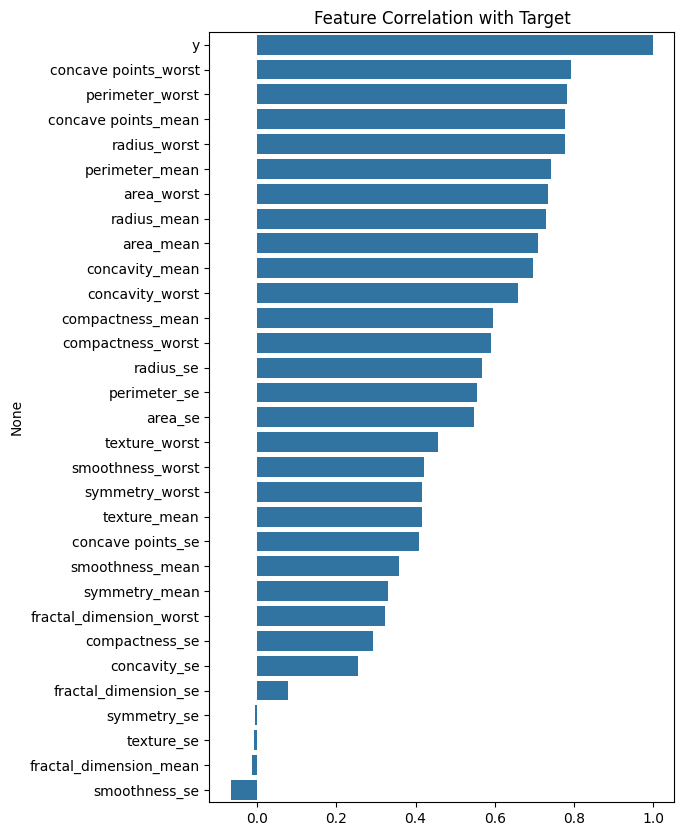

In [20]:
corr_target = df.drop(columns=['id', 'diagnosis']).corr()['y'].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title("Feature Correlation with Target")
plt.show()


Biểu đồ này thể hiện:
- Mức độ tương quan tuyến tính giữa từng thuộc tính
- Với biến mục tiêu (ung thư: M/B)

Giá trị càng lớn (gần 1):
- Thuộc tính càng phân biệt tốt hai lớp
- Càng phù hợp cho Logistic Regression

-> Nhiều thuộc tính có mức tương quan cao với biến mục tiêu nhưng lại mô tả cùng một đặc điểm hình học của khối u. Do đó, chỉ một số thuộc tính đại diện được chọn để tránh trùng lặp thông tin và giúp mô hình Logistic Regression đơn giản, ổn định và dễ diễn giải hơn.

In [21]:
df.drop(columns=['id', 'diagnosis', 'y']).describe().loc[['min', 'max']]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,0.09744,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750


Các đặc trưng có thang đo khác nhau đáng kể, do đó cần chuẩn hóa trước khi huấn luyện Logistic Regression.

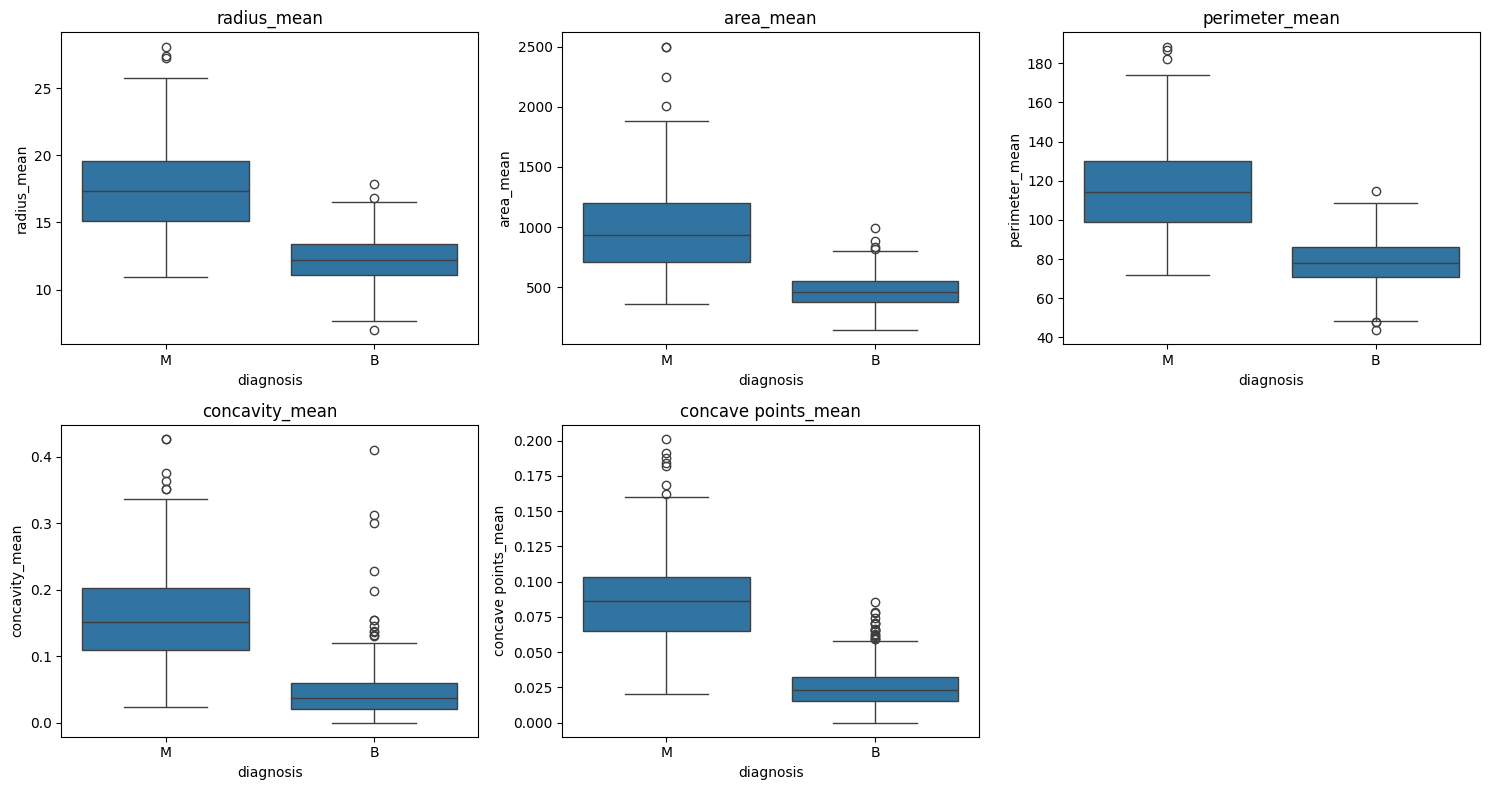

In [3]:
features = [
    "radius_mean",
    "area_mean",
    "perimeter_mean",
    "concavity_mean",
    "concave points_mean"
]

plt.figure(figsize=(15,8))
for i, col in enumerate(features, 1):
    plt.subplot(2,3,i)
    sns.boxplot(data=df, x="diagnosis", y=col)
    plt.title(col)

plt.tight_layout()
plt.show()


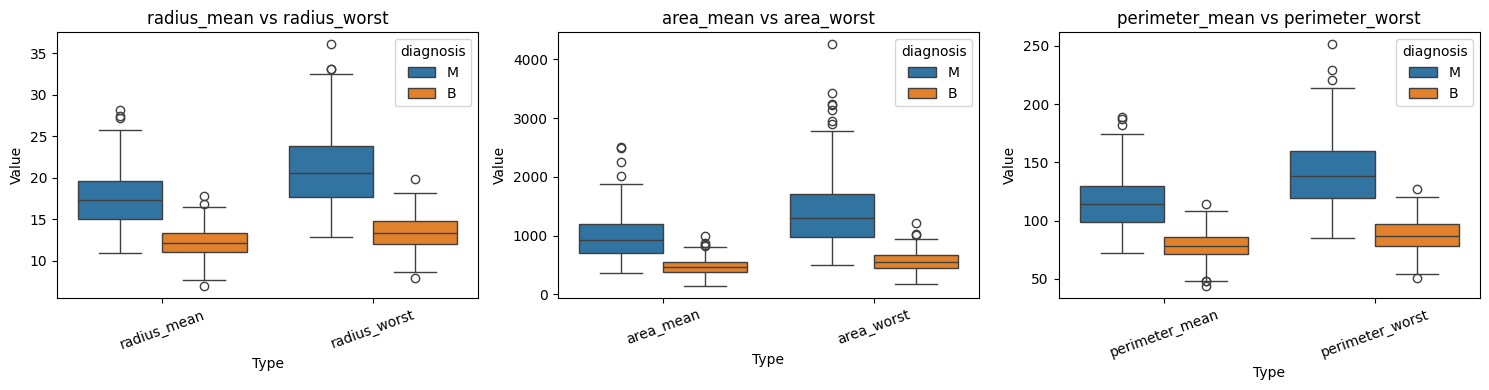

In [4]:
mean_worst_pairs = [
    ("radius_mean", "radius_worst"),
    ("area_mean", "area_worst"),
    ("perimeter_mean", "perimeter_worst")
]

plt.figure(figsize=(15,4))
for i, (mean_col, worst_col) in enumerate(mean_worst_pairs, 1):
    plt.subplot(1,3,i)
    sns.boxplot(
        data=df[["diagnosis", mean_col, worst_col]].melt(
            id_vars="diagnosis",
            var_name="Type",
            value_name="Value"
        ),
        x="Type",
        y="Value",
        hue="diagnosis"
    )
    plt.title(f"{mean_col} vs {worst_col}")
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()


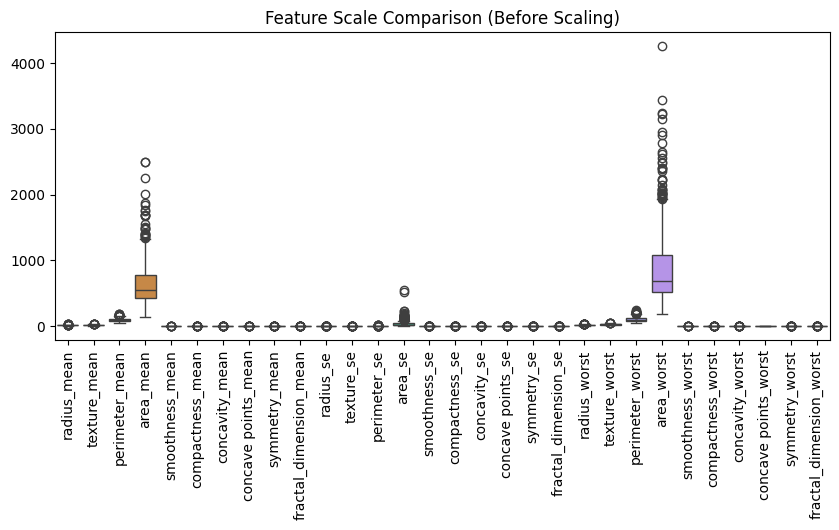

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df.drop(columns=["id","diagnosis"]))
plt.xticks(rotation=90)
plt.title("Feature Scale Comparison (Before Scaling)")
plt.show()
